# Streamlining pre-processing

**Goal:** Write a function to replace `../code/analysis.py` that
1. Loops over the events
2. Select events those with $\geq 3$ b-tags (DL1r 77%WP) that pass the *triggers* for the corresponding year
3. Saves a flattened numpy array.

For this training step, I want to just use SM over all the mc campaigns.

In [2]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from itertools import combinations

import json
import time
import h5py
import uproot

import os
os.sys.path.append('../code')
from preprocess import processDf,truthInfo, parallelTruthMatchJets, parallelGetCorrectPair
from preprocess import scale
from eventDisplays import truthDisplay

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
njets = 5

print("Nested for loops:")
for i0 in range(njets-3):
    for i1 in range(i0+1,njets-2):
        for i2 in range(i1+1,njets-1):
            for i3 in range(i2+1,njets):
                print(i0,i1,i2,i3)

print("\nitertools.combinations:")                
for i0,i1,i2,i3 in combinations(range(5),4):
    print(i0,i1,i2,i3)

Nested for loops:
0 1 2 3
0 1 2 4
0 1 3 4
0 2 3 4
1 2 3 4

itertools.combinations:
0 1 2 3
0 1 2 4
0 1 3 4
0 2 3 4
1 2 3 4


**One last bout of exploration**

**Goal:** Only look at events with jets with $p_T$ > 30 GeV and $|\eta| < 2.5$

The bit of code below is my *personal exploration* before putting it in the `processDf` function.

In [3]:
# Load file
mc16a_filename = "../../public/hh4b/SMNR/user.jagrundy.HH4B.450000.SM_HH.MC16a-2015-2016.AB21.2.91-MAR20-0.full_MiniNTuple.root/user.jagrundy.20736236._000001.MiniNTuple.root"

treename = "XhhMiniNtuple" 

f = uproot.open(mc16a_filename)
tree = f[treename]

In [12]:
tree.numentries

777150

In [7]:
mc16a = processDf(mc16a_filename)


Opening ../../public/hh4b/SMNR/user.jagrundy.HH4B.450000.SM_HH.MC16a-2015-2016.AB21.2.91-MAR20-0.full_MiniNTuple.root/user.jagrundy.20736236._000001.MiniNTuple.root
Loading in the event df
Loading in the jet array

  Jet sfs for evts with 1 selected jets out of 4 resolved jets
  Jet sfs for evts with 2 selected jets out of 4 resolved jets
  Jet sfs for evts with 3 selected jets out of 4 resolved jets
  Jet sfs for evts with 4 selected jets out of 4 resolved jets

  Jet sfs for evts with 1 selected jets out of 5 resolved jets
  Jet sfs for evts with 2 selected jets out of 5 resolved jets
  Jet sfs for evts with 3 selected jets out of 5 resolved jets
  Jet sfs for evts with 4 selected jets out of 5 resolved jets
  Jet sfs for evts with 5 selected jets out of 5 resolved jets

  Jet sfs for evts with 1 selected jets out of 6 resolved jets
  Jet sfs for evts with 2 selected jets out of 6 resolved jets
  Jet sfs for evts with 3 selected jets out of 6 resolved jets
  Jet sfs for evts with 4 

In [8]:
nJetsMax = 8
df_selJets = processDf(mc16a_filename, nJetsMax=8)


Opening ../../public/hh4b/SMNR/user.jagrundy.HH4B.450000.SM_HH.MC16a-2015-2016.AB21.2.91-MAR20-0.full_MiniNTuple.root/user.jagrundy.20736236._000001.MiniNTuple.root
Loading in the event df
Loading in the jet array

  Jet sfs for evts with 1 selected jets out of 4 resolved jets
  Jet sfs for evts with 2 selected jets out of 4 resolved jets
  Jet sfs for evts with 3 selected jets out of 4 resolved jets
  Jet sfs for evts with 4 selected jets out of 4 resolved jets

  Jet sfs for evts with 1 selected jets out of 5 resolved jets
  Jet sfs for evts with 2 selected jets out of 5 resolved jets
  Jet sfs for evts with 3 selected jets out of 5 resolved jets
  Jet sfs for evts with 4 selected jets out of 5 resolved jets
  Jet sfs for evts with 5 selected jets out of 5 resolved jets

  Jet sfs for evts with 1 selected jets out of 6 resolved jets
  Jet sfs for evts with 2 selected jets out of 6 resolved jets
  Jet sfs for evts with 3 selected jets out of 6 resolved jets
  Jet sfs for evts with 4 

In [9]:
df_baseline = processDf(mc16a_filename, nJetsMax=8,pT_min=40,eta_max=2.5)


Opening ../../public/hh4b/SMNR/user.jagrundy.HH4B.450000.SM_HH.MC16a-2015-2016.AB21.2.91-MAR20-0.full_MiniNTuple.root/user.jagrundy.20736236._000001.MiniNTuple.root
Loading in the event df
Loading in the jet array

  Jet sfs for evts with 1 selected jets out of 4 resolved jets
  Jet sfs for evts with 2 selected jets out of 4 resolved jets
  Jet sfs for evts with 3 selected jets out of 4 resolved jets
  Jet sfs for evts with 4 selected jets out of 4 resolved jets

  Jet sfs for evts with 1 selected jets out of 5 resolved jets
  Jet sfs for evts with 2 selected jets out of 5 resolved jets
  Jet sfs for evts with 3 selected jets out of 5 resolved jets
  Jet sfs for evts with 4 selected jets out of 5 resolved jets
  Jet sfs for evts with 5 selected jets out of 5 resolved jets

  Jet sfs for evts with 1 selected jets out of 6 resolved jets
  Jet sfs for evts with 2 selected jets out of 6 resolved jets
  Jet sfs for evts with 3 selected jets out of 6 resolved jets
  Jet sfs for evts with 4 

In [10]:
df_selJets[[f'j{i}_pt' for i in range(8)]].head()

j0_pt       j1_pt       j2_pt      j3_pt      j4_pt  j5_pt  j6_pt  \
entry                                                                           
0       65.844810   56.410419   55.581108  52.658108   0.000000    0.0    0.0   
1      252.587738  231.312729   71.114220  39.821972   0.000000    0.0    0.0   
2      141.734589  119.388428  108.974922  96.425415  92.037949    0.0    0.0   
3      257.930939  181.925613  120.848923  43.577045   0.000000    0.0    0.0   
4       55.446815   68.152954   39.259193  31.937237   0.000000    0.0    0.0   

       j7_pt  
entry         
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0

In [11]:
np.max(df_selJets.j7_pt)

200.34304809570312

Ok - something is still *wrong* w/ this selection function, but I'll sort it out *tomorrow*.

In [12]:
df_max8 = processDf(mc16a_filename, nJetsMax=8,pT_min=25,eta_max=5)


Opening ../../public/hh4b/SMNR/user.jagrundy.HH4B.450000.SM_HH.MC16a-2015-2016.AB21.2.91-MAR20-0.full_MiniNTuple.root/user.jagrundy.20736236._000001.MiniNTuple.root
Loading in the event df
Loading in the jet array

  Jet sfs for evts with 4 selected jets out of 4 resolved jets

  Jet sfs for evts with 5 selected jets out of 5 resolved jets

  Jet sfs for evts with 6 selected jets out of 6 resolved jets

  Jet sfs for evts with 7 selected jets out of 7 resolved jets

  Jet sfs for evts with 8 selected jets out of 8 resolved jets

  Jet sfs for evts with 9 selected jets out of 9 resolved jets

  Jet sfs for evts with 10 selected jets out of 10 resolved jets

  Jet sfs for evts with 11 selected jets out of 11 resolved jets

  Jet sfs for evts with 12 selected jets out of 12 resolved jets

  Jet sfs for evts with 13 selected jets out of 13 resolved jets

  Jet sfs for evts with 14 selected jets out of 14 resolved jets

  Jet sfs for evts with 15 selected jets out of 15 resolved jets

  Je

In [13]:
df_max8[[f'j{i}_pt' for i in range(8)]].head()

j0_pt       j1_pt       j2_pt      j3_pt      j4_pt      j5_pt  \
entry                                                                        
0       65.844810   56.410419   55.581108  52.658108   0.000000   0.000000   
1      252.587738  231.312729   71.114220  39.821972   0.000000   0.000000   
2      141.734589  119.388428  108.974922  96.425415  92.037949  35.655270   
3      257.930939  181.925613  120.848923  97.763092  43.577045   0.000000   
4       59.547409   55.446815   68.152954  39.259193  34.313633  31.937237   

           j6_pt  j7_pt  
entry                    
0       0.000000    0.0  
1       0.000000    0.0  
2       0.000000    0.0  
3       0.000000    0.0  
4      28.618584    0.0

In [14]:
df_max8

eventNumber  nresolvedJets  resolved_nBTags  mcEventWeight  \
entry                                                                
0               442              4                3       0.120290   
1              1127              4                3       0.011632   
2              1088              6                4       0.037104   
3              1832              5                2       0.013726   
4               581              7                2      -0.061333   
...             ...            ...              ...            ...   
777145       484191              5                4       0.072029   
777146       484890              7                3       0.033298   
777147       484271              7                2       0.073359   
777148       484157              2                2       0.000148   
777149       484837              8                3      -0.049120   

        weight_pileup  rand_run_nr       j0_pt    j0_eta    j0_phi  \
entry                                                                
0            0.832972       310863   65.844810  0.146446  2.467891   
1            1.091507       302137  252.587738  0.840473 -1.964215   
2            0.913518       307619  141.734589 -1.114459  0.415969   
3            0.874238       307259  257.930939 -1.211013 -1.237010   
4            0.906756       302872   59.547409 -2.937065 -2.577415   
...               ...          ...         ...       ...       ...   
777145       1.226296       284285  106.015533  0.617813 -0.337005   
777146       1.152634       310809  197.907532 -1.820346  1.200698   
777147       1.195243       311365  134.191879  2.190189  0.642710   
777148       1.055819       302393    0.000000  0.000000  0.000000   
777149       0.837939       300863  314.114410 -1.954780  0.561871   

               j0_E  ...  j3_drMatch  j4_drMatch  j5_drMatch  j6_drMatch  \
entry                ...                                                   
0         67.811531  ...    0.034299   10.000000   10.000000   10.000000   
1        348.805847  ...    0.506813   10.000000   10.000000   10.000000   
2        240.037628  ...   10.000000    0.024369   10.000000   10.000000   
3        472.113464  ...   10.000000   10.000000   10.000000   10.000000   
4        563.178162  ...    0.426459    0.265223   10.000000   10.000000   
...             ...  ...         ...         ...         ...         ...   
777145   127.151184  ...    0.178307   10.000000   10.000000   10.000000   
777146   627.856567  ...   10.000000   10.000000   10.000000    0.218639   
777147   607.433228  ...   10.000000   10.000000   10.000000   10.000000   
777148     0.000000  ...   10.000000   10.000000   10.000000   10.000000   
777149  1131.612183  ...    0.036278   10.000000    0.261418   10.000000   

        j7_drMatch  correctPair  sameParent  unique  dRmatch  goodJets  
entry                                                                   
0             10.0            2       False    True     True      True  
1             10.0           -1        True   False    False     False  
2             10.0            5       False    True     True      True  
3             10.0           -1       False   False    False     False  
4             10.0           -1       False    True    False     False  
...            ...          ...         ...     ...      ...       ...  
777145        10.0            1       False    True     True      True  
777146        10.0           11       False    True     True      True  
777147        10.0           -1       False   False    False     False  
777148        10.0           -1        True   False     True     False  
777149        10.0           49       False    True     True      True  

[777150 rows x 116 columns]

In [15]:
np.max(np.abs(df_max8[[f'j{i}_eta' for i in range(8)]].values))

4.812684059143066

**Goal:** Check how the # of $b$-jets depends on the max cut on the # of jets if you sort them by the jet $p_T$.

(It's a good idea to try to make a plot like this, but it might take a bit of time?)

I'll mask new columns for the max number of jets I have:
- ntag_max4
- ntag_max5
- ntag_max6
- ntag_max7
- ntag_max8 (although this last one is just the same as ntag)

I can look at the mean and avg of these numbers, but I think of more interest is the *relative efficiency* of these numbers compared to `resolved_nBTags`.

What I'm *hoping* to see is if I include up to 6 jets, I'm including all of the jets of interest!

While I'm at it, store how many $b$-quarks I've matched to with the jets.

In [16]:
nJetsMax=8

for df in [df_max8,df_selJets,df_baseline]:
    df['njets'] = np.sum(df[[f'j{i}_pt' for i in range(nJetsMax)]] != 0, axis=1)
    parallelGetCorrectPair(df,nJetsMax)

In [17]:
# goodJets(df_selJets)
# goodJets(df_max8)
# goodJets(df_baseline)

In [18]:
Rmatch = 0.3

In [19]:
for nJetsMax in range(4,9):
    df_max8[f'ntag_max{nJetsMax}'] = np.sum(df_max8[[f'j{i}_Db' for i in range(nJetsMax)]] >= 3,axis=1)  
    df_max8[f'nb_max{nJetsMax}']   = np.sum((df_max8[[f'j{i}_bidx' for i in range(nJetsMax)]] != -1).values\
                                            &(df_max8[[f'j{i}_drMatch' for i in range(nJetsMax)]] < Rmatch).values,\
                                            axis=1) 
    
    df_selJets[f'ntag_max{nJetsMax}'] = np.sum(df_selJets[[f'j{i}_Db' for i in range(nJetsMax)]] >= 3,axis=1)  
    df_selJets[f'nb_max{nJetsMax}']   = np.sum((df_selJets[[f'j{i}_bidx' for i in range(nJetsMax)]] != -1).values\
                                               &(df_selJets[[f'j{i}_drMatch' for i in range(nJetsMax)]] < Rmatch).values,\
                                               axis=1) 
    
    df_baseline[f'ntag_max{nJetsMax}'] = np.sum(df_baseline[[f'j{i}_Db' for i in range(nJetsMax)]] >= 3,axis=1)  
    df_baseline[f'nb_max{nJetsMax}']   = np.sum((df_baseline[[f'j{i}_bidx' for i in range(nJetsMax)]] != -1).values\
                                                &(df_selJets[[f'j{i}_drMatch' for i in range(nJetsMax)]] < Rmatch).values,\
                                                axis=1) 

In [20]:
np.mean(df_max8[f'nb_max4']),np.mean(df_max8[f'nb_max8'])

(2.8887061699800554, 3.331226918870231)

In [21]:
np.mean(df_selJets[f'nb_max4']),np.mean(df_selJets[f'nb_max8'])

(2.8922434536447277, 3.2185704175513092)

**Goal:** Also figure out how to save `j{i}_drMatch`

In [22]:
parallelTruthMatchJets(df_max8,8)

njets =  4
njets =  5
njets =  6
njets =  7
njets =  8


In [23]:
parallelTruthMatchJets(df_selJets,8)
parallelTruthMatchJets(df_baseline,8)

njets =  4
njets =  5
njets =  6
njets =  7
njets =  8
njets =  4
njets =  5
njets =  6
njets =  7
njets =  8


**Question:** How often is the $\Delta R(b,j) < 0.3$ check passed and the jet indices are not unique?

### Useful numbers

1. How many events get thrown out with the "goodJets" category?
2. How often is the $\Delta R$ requirement satisfied, but the 

And, I think it's useful to look at these numbers for a few separate cases:
1. Max 8 jets - XhhCommon pre-selection
2. Max 8 jets - jet $p_T$ > 30 GeV, $|\eta| < 2.5$ jet selection

And for all jets passing the pre-selection, and just 3b events.

I could look before + after the trigger as well?

**Stop!** I need to focus on pariAGraph inputs rn, *not* the baseline analysis.

In [24]:
den1 = np.sum(df_max8['mcEventWeight'])
den2 = np.sum(df_max8.loc[df_max8.resolved_nBTags >= 3,'mcEventWeight'])

print('No jet preselection: max 8 jets')
print('not good jets')
x1 = 100*np.sum(df_max8.loc[~df_max8.goodJets,'mcEventWeight'])/den1
x2 = 100*np.sum(df_max8.loc[~df_max8.goodJets & (df_max8.resolved_nBTags >= 3),'mcEventWeight'])/den2
print(f'  all:   {x1:.3f}')
print(f'  >= 3b: {x2:.3f}')

x1 = 100*np.sum(df_max8.loc[~df_max8.unique & df_max8.dRmatch,'mcEventWeight'])/den1
x2 = 100*np.sum(df_max8.loc[~df_max8.unique & df_max8.dRmatch & (df_max8.resolved_nBTags >= 3),'mcEventWeight'])/den2
print('dRmatch, not unique')
print(f'  all:   {x1:.3f}')
print(f'  >= 3b: {x2:.3f}')

No jet preselection: max 8 jets
not good jets
  all:   54.828
  >= 3b: 43.962
dRmatch, not unique
  all:   1.643
  >= 3b: 1.361


In [25]:
den1 = np.sum(df_selJets['mcEventWeight'])
den2 = np.sum(df_selJets.loc[df_selJets.resolved_nBTags >= 3,'mcEventWeight'])

print('No jet preselection: max 8 jets')
print('not good jets')
x1 = 100*np.sum(df_selJets.loc[~df_selJets.goodJets,'mcEventWeight'])/den1
x2 = 100*np.sum(df_selJets.loc[~df_selJets.goodJets & (df_selJets.ntag >= 3),'mcEventWeight'])/den2
print(f'  all:   {x1:.3f}')
print(f'  >= 3b: {x2:.3f}')

x1 = 100*np.sum(df_selJets.loc[~df_selJets.unique & df_selJets.dRmatch,'mcEventWeight'])/den1
x2 = 100*np.sum(df_selJets.loc[~df_selJets.unique & df_selJets.dRmatch & (df_selJets.ntag >= 3),'mcEventWeight'])/den2
print('dRmatch, not unique')
print(f'  all:   {x1:.3f}')
print(f'  >= 3b: {x2:.3f}')

No jet preselection: max 8 jets
not good jets
  all:   63.286
  >= 3b: 48.460
dRmatch, not unique
  all:   1.512
  >= 3b: 1.313


Ok - now I'm kind of kicking myself for spending so long on this *it's so few events*!!

The only way a semi-merged or boosted category could be useful for the $\kappa_\lambda = 1$ limit is if it's *really* good at background rejection.

In [26]:
df_max8[~df_max8.unique & df_max8.dRmatch & ~df_max8.sameParent & (df_max8.resolved_nBTags >= 3)]

eventNumber  nresolvedJets  resolved_nBTags  mcEventWeight  \
entry                                                                
69             1527              5                3       0.106217   
178            1846              7                3       0.003331   
209            1130              5                3       0.131379   
451            1417              5                3       0.081496   
1033            863              5                3       0.013037   
...             ...            ...              ...            ...   
776036       473814              5                3       0.004643   
776190       484623              6                3       0.010885   
776366       484180              5                3       0.003695   
776372       473444              5                4       0.134380   
776425       484800              6                3       0.059452   

        weight_pileup  rand_run_nr       j0_pt    j0_eta    j0_phi  \
entry                                                                
69           1.008251       307569  175.314514  1.147494  2.843982   
178          1.018208       300863  662.394409 -1.669536 -2.928672   
209          0.862172       305811  112.379250  0.766615  0.299177   
451          0.980906       309759  222.808365  1.295962  1.230362   
1033         0.965117       303264  309.967346 -0.156066  0.939690   
...               ...          ...         ...       ...       ...   
776036       1.055819       309640  588.523682 -1.362728  1.499912   
776190       1.039773       302137  271.916138 -0.156810  1.605371   
776366       1.072254       301973  336.981049  0.916044 -2.060496   
776372       0.906756       307716  240.298889 -1.442152  2.823836   
776425       0.837939       310249  164.184708  2.171497  2.356920   

               j0_E  ...  ntag_max4  nb_max4  ntag_max5  nb_max5  ntag_max6  \
entry                ...                                                      
69       304.457153  ...          3        3          3        3          3   
178     1825.139771  ...          2        2          2        2          2   
209      147.400375  ...          3        3          3        3          3   
451      437.771393  ...          3        3          3        3          3   
1033     315.263977  ...          3        3          3        3          3   
...             ...  ...        ...      ...        ...      ...        ...   
776036  1225.307495  ...          2        2          3        3          3   
776190   277.904388  ...          3        3          3        3          3   
776366   489.575439  ...          3        3          3        3          3   
776372   538.069031  ...          3        2          4        3          4   
776425   729.525513  ...          3        3          3        3          3   

        nb_max6  ntag_max7  nb_max7  ntag_max8  nb_max8  
entry                                                    
69            3          3        3          3        3  
178           2          3        3          3        3  
209           3          3        3          3        3  
451           3          3        3          3        3  
1033          3          3        3          3        3  
...         ...        ...      ...        ...      ...  
776036        3          3        3          3        3  
776190        3          3        3          3        3  
776366        3          3        3          3        3  
776372        3          4        3          4        3  
776425        3          3        3          3        3  

[2678 rows x 126 columns]

Woah - this is still *a lot* of events left unaccounted for!

I could plot $m_{hh}$, jet multiplicity and the truth higgs $p_T$s - or just look at more event displays!!

### Event Displays

**Goal:** Understand if these 25 GeV < $p_T$ < 40 GeV plots are messing up my truth labelling - I just want to look at some events.

And really, I should just look at the jets with at least 3 b-tags.

In [27]:
jvars = ['pt','eta','phi','DL1r','is_DL1r_FixedCutBEff_77','Quantile_DL1r_Continuous','HadronConeExclTruthLabelID']
jdf = tree.pandas.df([f'resolvedJets_{v}' for v in jvars])

In [28]:
np.unique(jdf['resolvedJets_HadronConeExclTruthLabelID'])

array([ 0,  4,  5, 15], dtype=int32)

So this labelling just includes l, c, b, and $\tau$ jets, as expected.

In [29]:
pdg_to_label = {0:0, 4:1, 5:2, 15:3}
jdf['resolvedJets_label'] = jdf['resolvedJets_HadronConeExclTruthLabelID'].map(pdg_to_label)

In [30]:
text = "$\mathbf{ATLAS}$ Simulation Internal\n"
text += f"SM NR mc16a MAR20 MNT prod\n"
text += "Jets with $p_T$ > 25 GeV, b-tags with DL1r 77% WP"

In [31]:
min_bpt = np.min(df_max8[[f'b{i}_pt' for i in range(4)]],axis=1)

In [32]:
pts = df_max8[[f'j{i}_pt' for i in range(8)]].values
Dbs = df_max8[[f'j{i}_Db' for i in range(8)]].values

pts[Dbs >= 3] = 0

df_max8['ISR_pt'] = np.max(pts,axis=1)

In [33]:
recoil = np.abs(df_max8.truth_pthh/df_max8.ISR_pt-1)<0.3

In [34]:
mask = ~df_max8.unique & df_max8.dRmatch & ~df_max8.sameParent & (df_max8.resolved_nBTags >= 3) 
mask = mask & (min_bpt > 25) & ~recoil
underInvestigation = df_max8[mask].index

In [35]:
underInvestigation

Int64Index([   178,    209,   1391,   4702,   5834,   6433,   9810,  10580,
             11145,  12760,
            ...
            768903, 769790, 770907, 770966, 771607, 771834, 772261, 772860,
            773554, 776366],
           dtype='int64', name='entry', length=659)

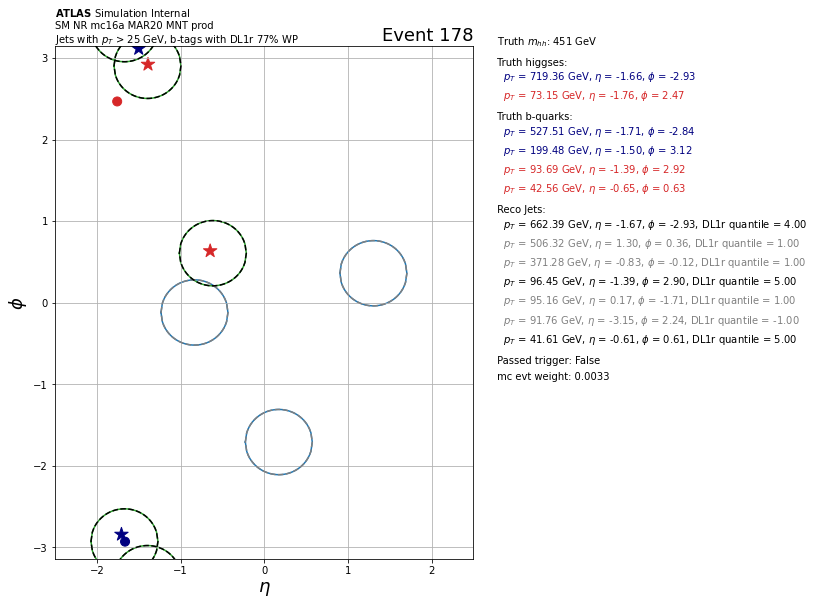

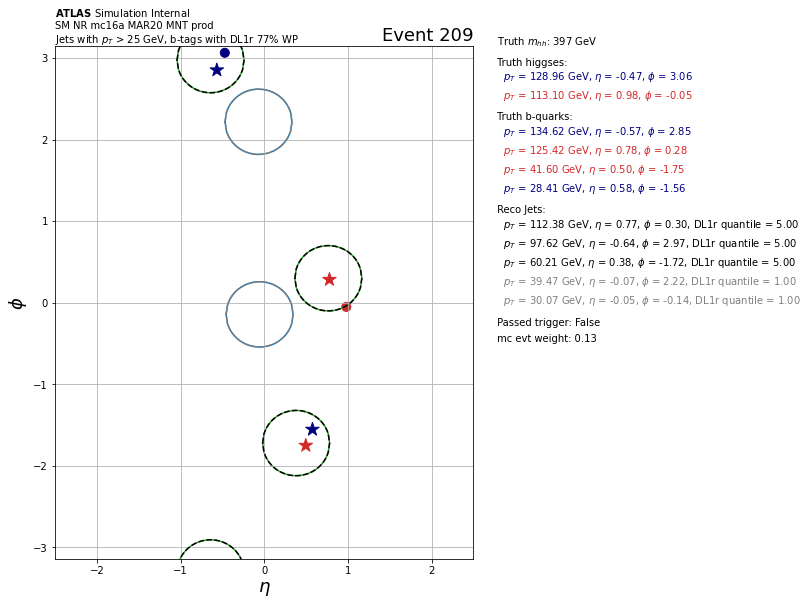

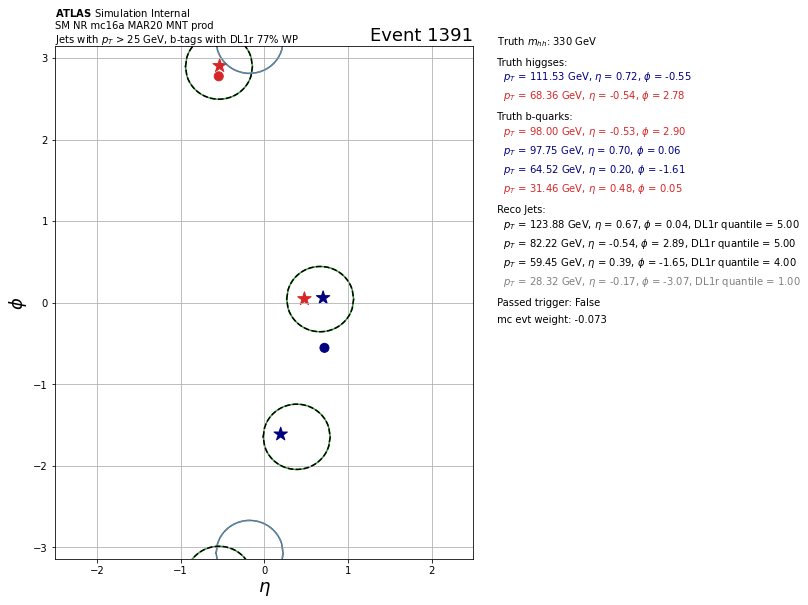

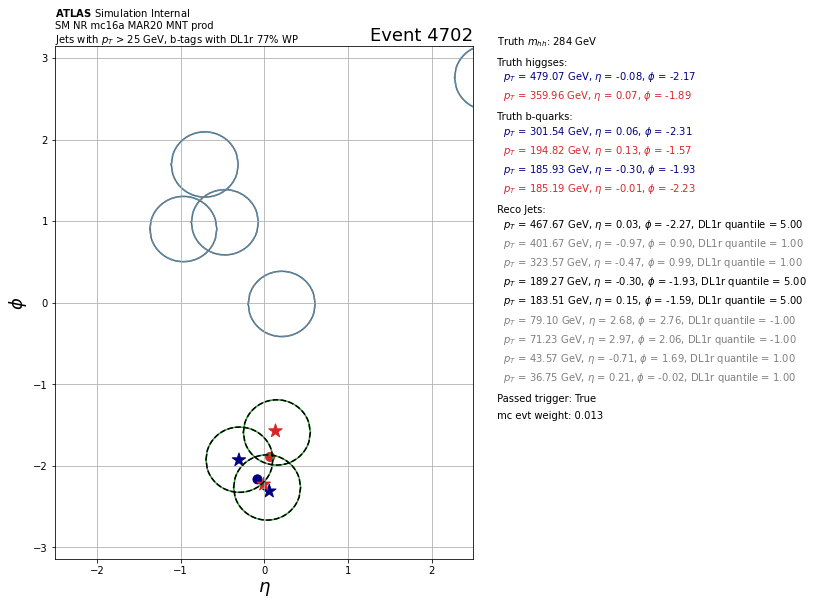

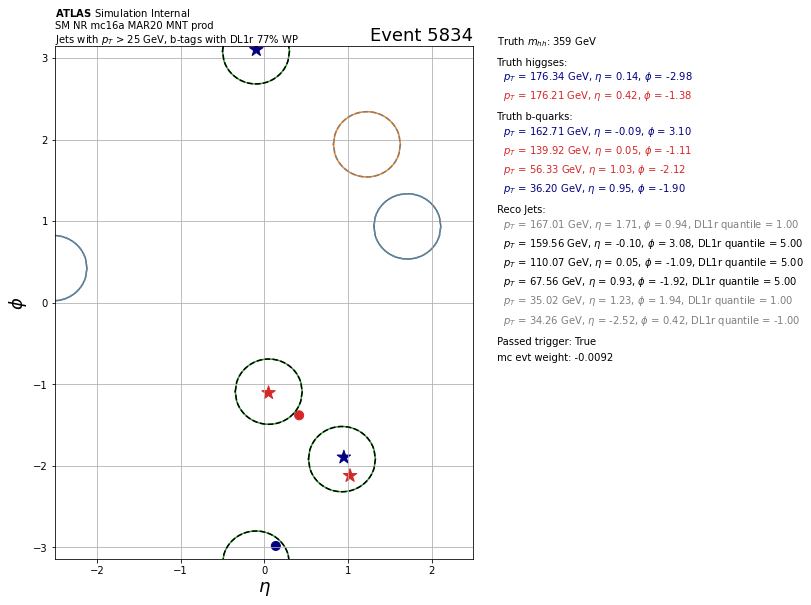

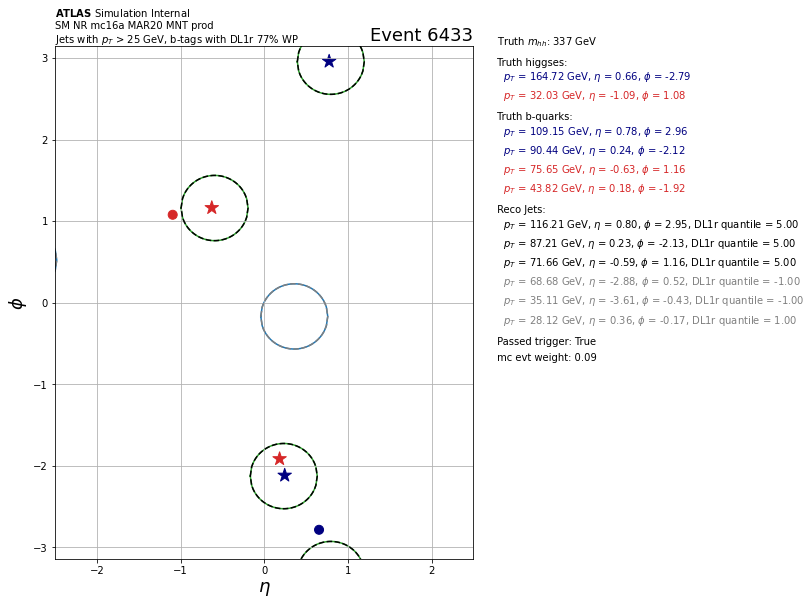

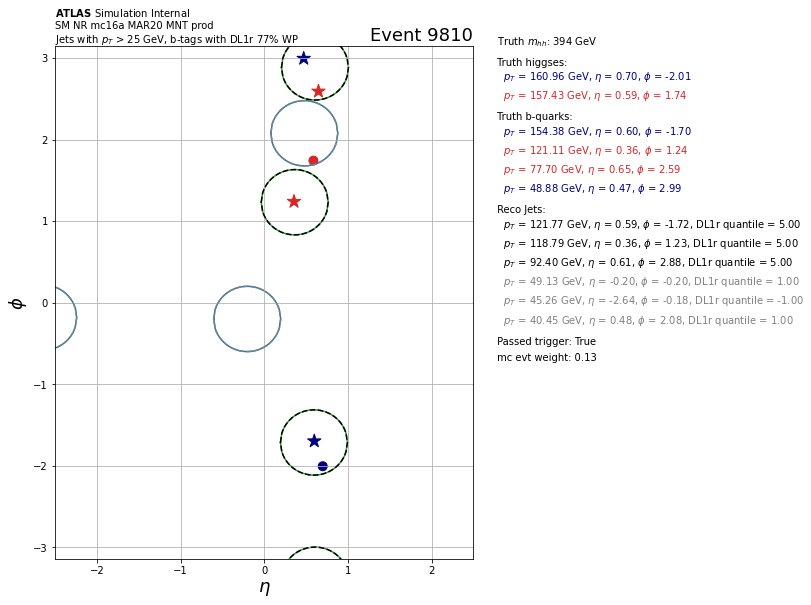

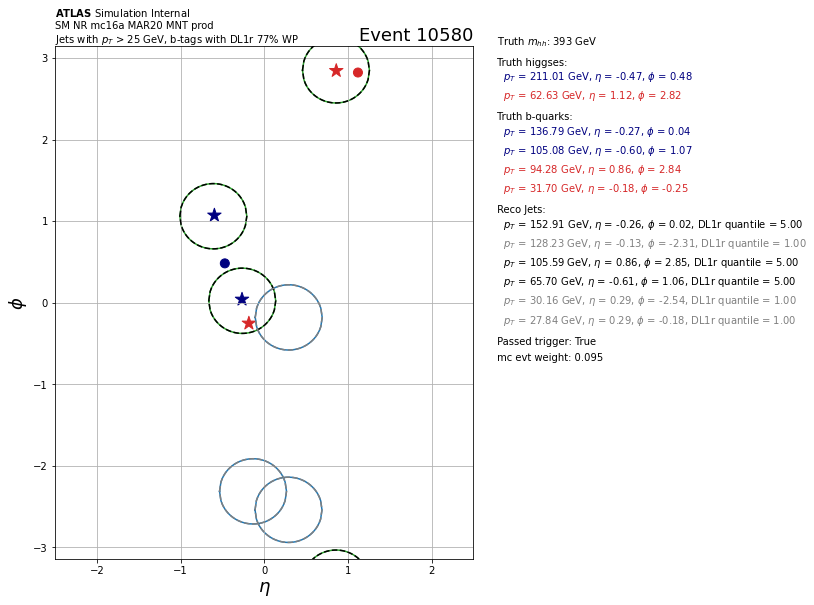

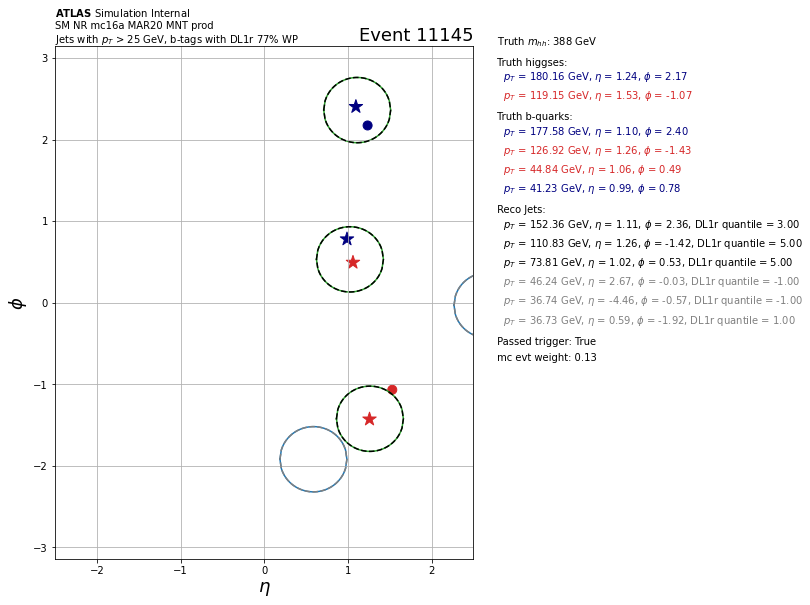

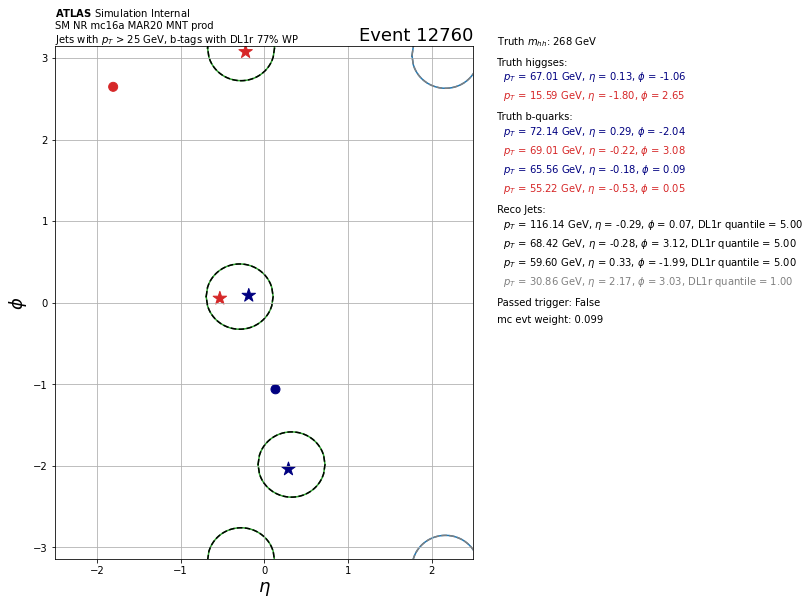

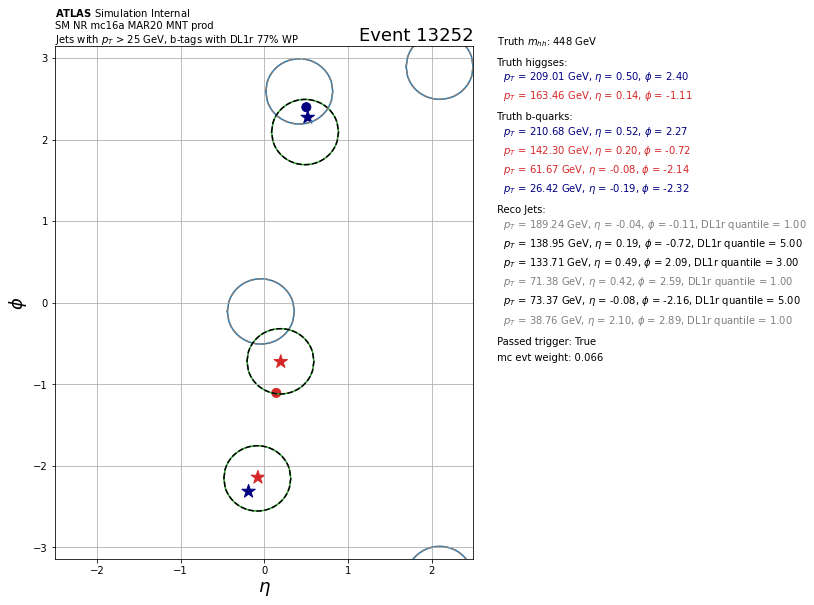

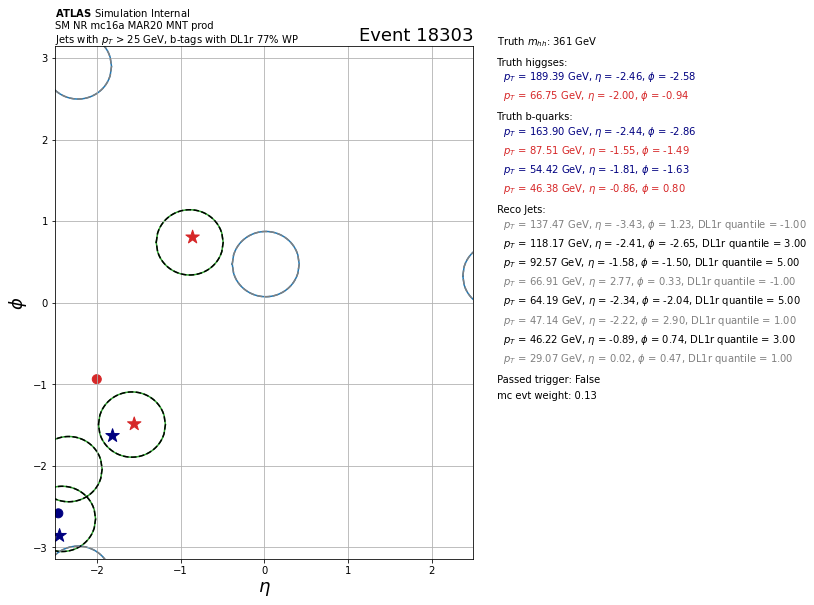

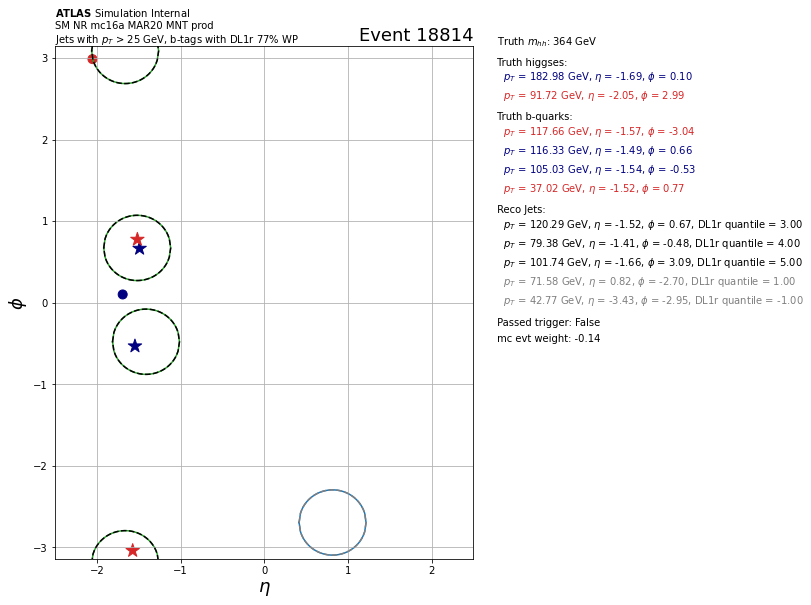

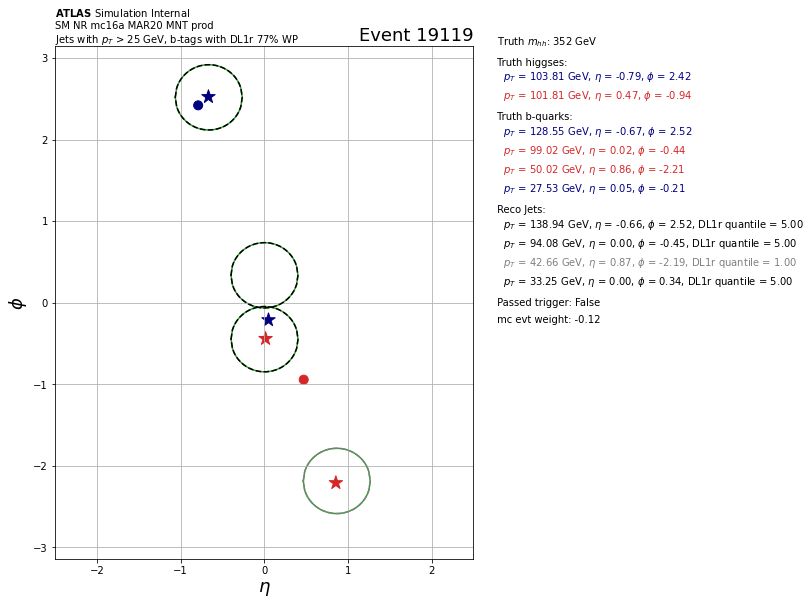

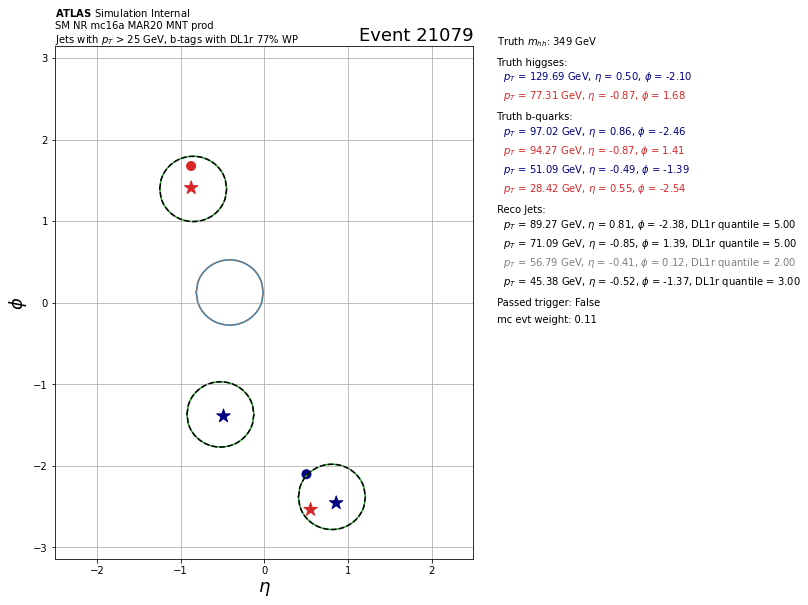

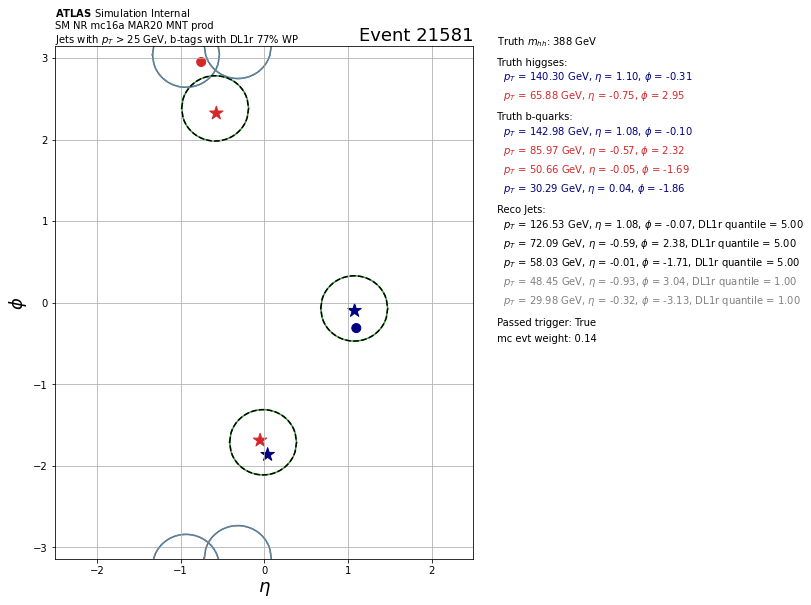

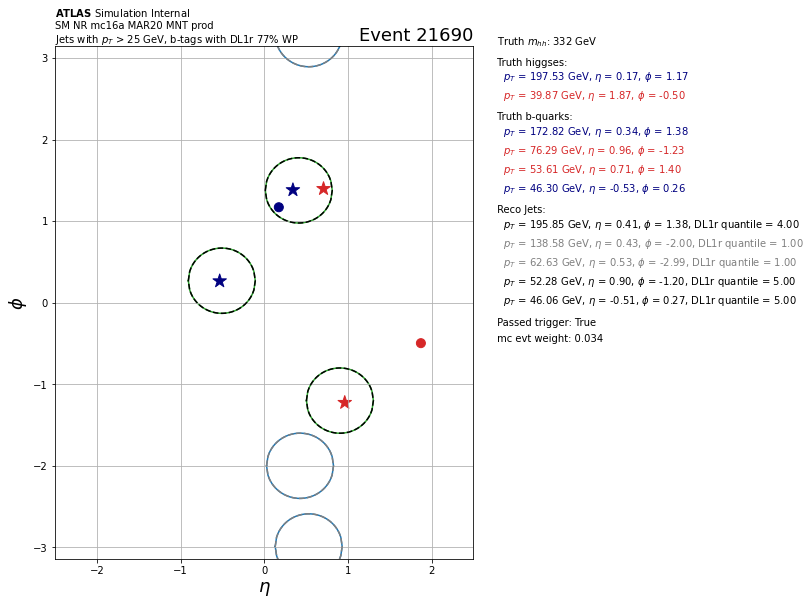

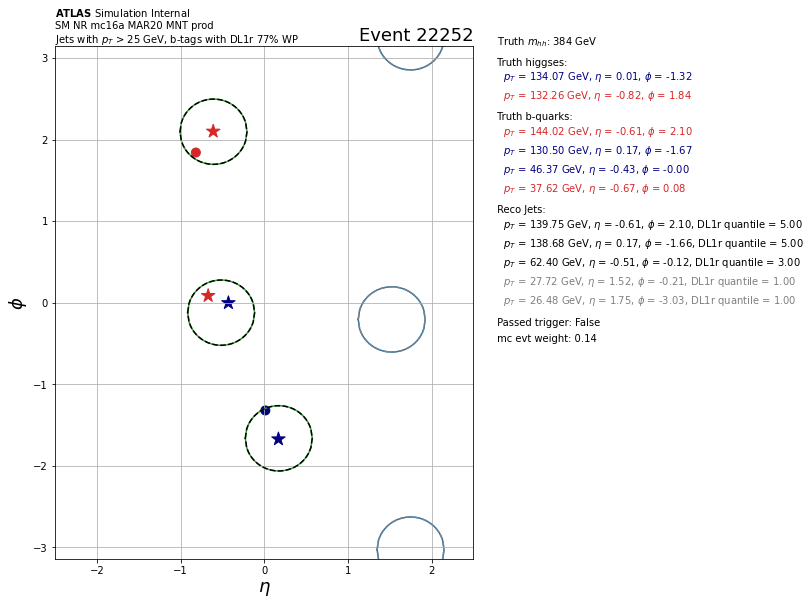

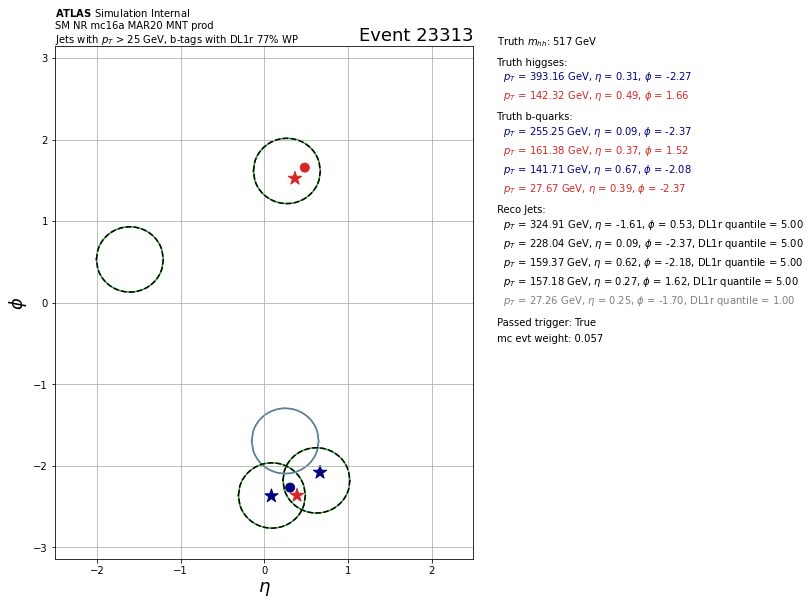

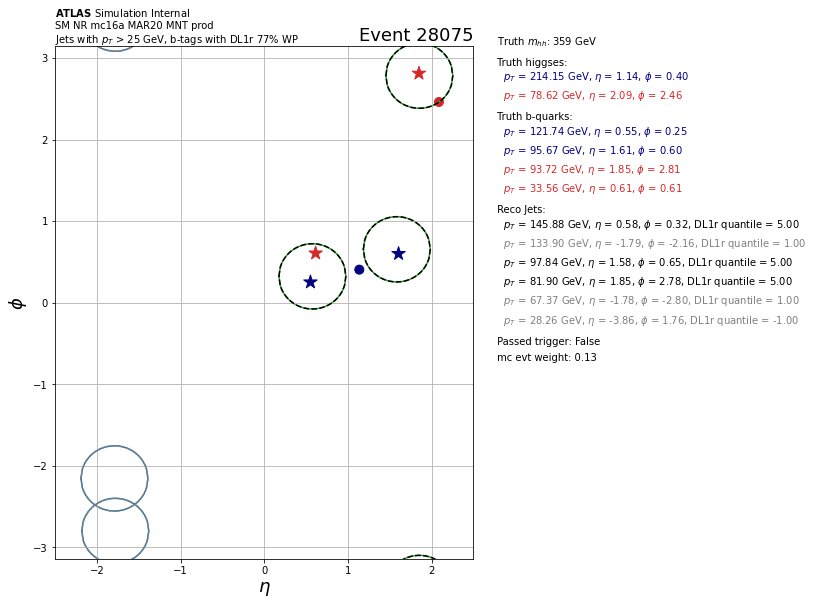

In [36]:
for ievt in underInvestigation[:20]:
    truthDisplay(ievt,df_max8,triggerKey=True,mode=1,jdf=jdf,tagger='DL1r',WP=77,quantile=True,
                 text=text,figDir='figures/EDA/SMNR_mc16a_PFlow-MAR2020/')

From these event displays, I came up with three categories

**Category 1:** How often do these non-unique jets with the $\Delta R$  have $b$-quarks from the same Higgs getting assigned to the *same* jet?

In [37]:
num = np.sum(df_max8.loc[~df_max8.unique & df_max8.dRmatch & df_max8.sameParent,'mcEventWeight'])
den = np.sum(df_max8.loc[~df_max8.unique & df_max8.dRmatch,'mcEventWeight'])

num / den

0.14507757

In [38]:
num = np.sum(df_max8.loc[~df_max8.unique & df_max8.dRmatch & (df_max8.resolved_nBTags >= 3) & df_max8.sameParent,'mcEventWeight'])
den = np.sum(df_max8.loc[~df_max8.unique & df_max8.dRmatch & (df_max8.resolved_nBTags >= 3),'mcEventWeight'])

num / den

0.112177536

Only 12% of the time.

In [39]:
250 / .55

454.5454545454545

In [40]:
lead_hpt = np.max(df_max8[[f'h{i}_pt' for i in range(2)]],axis=1)

In [41]:
num = np.sum(df_max8.loc[~df_max8.unique & df_max8.dRmatch & (df_max8.resolved_nBTags >= 3) & (lead_hpt > 454),'mcEventWeight'])
den = np.sum(df_max8.loc[~df_max8.unique & df_max8.dRmatch & (df_max8.resolved_nBTags >= 3),'mcEventWeight'])

num / den

0.114487655

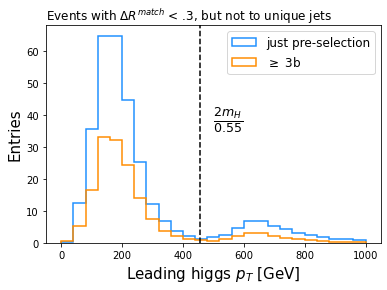

In [42]:
plt.hist(lead_hpt[~df_max8.unique & df_max8.dRmatch],
         25,(0,1000),histtype='step',linewidth=1.5,
         label='just pre-selection',color='dodgerblue',
         weights=df_max8.loc[~df_max8.unique & df_max8.dRmatch,'mcEventWeight'])
plt.hist(lead_hpt[~df_max8.unique & df_max8.dRmatch&(df_max8.resolved_nBTags >= 3)],
         25,(0,1000),histtype='step',linewidth=1.5,
         label='$\geq$ 3b',color='darkorange',
         weights=df_max8.loc[~df_max8.unique & df_max8.dRmatch & (df_max8.resolved_nBTags >= 3),'mcEventWeight'])

ylim = plt.ylim()
plt.plot([250/.55]*2,ylim,'k--')
plt.ylim(ylim)
plt.legend()

plt.xlabel('Leading higgs $p_T$ [GeV]',fontsize=15)
plt.ylabel('Entries',fontsize=15)
plt.legend(fontsize=12)

ax = plt.gca()
plt.text(0,1,'Events with $\Delta R^{match}$ < .3, but not to unique jets',
         ha='left',va='bottom',transform=ax.transAxes,fontsize=12)
plt.text(.5,.5,r'$\frac{2m_H}{0.55}$',fontsize=18,
         ha='left',va='bottom',transform=ax.transAxes)

plt.savefig('figures/EDA/SMNR_mc16a_PFlow-MAR2020/lead_higgs_pt.pdf',bbox_inches='tight')
plt.show()

11% vs 12% - honestly this is pretty similar.

**Category 2:** How often are one of these $b$-quarks so low that we wouldn't have actually reconstructed it ?

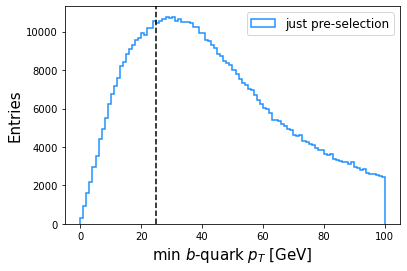

In [43]:
plt.hist(min_bpt,100,(0,100),histtype='step',linewidth=1.5,label='just pre-selection',
         color='dodgerblue')

plt.xlabel('min $b$-quark $p_T$ [GeV]',fontsize=15)
plt.ylabel('Entries',fontsize=15)
ylim = plt.ylim()
plt.plot([25,25],ylim,'k--')
plt.ylim(ylim)
plt.legend(fontsize=12)

plt.show()

25 GeV is the jet $p_T$ cut, but I'm not sure but these jets have the $\mu$-in-jet correction applied and $p_T$ reco applied, so it should be safe to cut on the same value as the jet $p_T$ threshold.

I should break this down by # of b-tags, the trigger, and ! unique matches tho!!

- Maybe I could use dashed lines to show the events with $b$-quarks that aren't matched to unique jets?

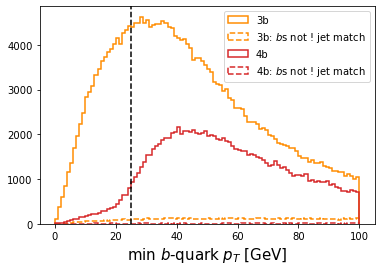

In [44]:
plt.hist(min_bpt[df_max8.resolved_nBTags==3],100,(0,100),color='darkorange',
         histtype='step',linewidth=1.5,label='3b')
plt.hist(min_bpt[(df_max8.resolved_nBTags==3) & ~df_max8.unique & df_max8.dRmatch],
         100,(0,100),color='darkorange',linestyle='--',
         histtype='step',linewidth=1.5,
         label='3b: $b$s not ! jet match')

plt.hist(min_bpt[df_max8.resolved_nBTags>=4],100,(0,100),color='C3',
         histtype='step',linewidth=1.5,label='4b')
plt.hist(min_bpt[(df_max8.resolved_nBTags>=4) & ~df_max8.unique & df_max8.dRmatch],
         100,(0,100),color='C3',linestyle='--',
         histtype='step',linewidth=1.5,
         label='4b: $b$s not ! jet match')

plt.xlabel('min $b$-quark $p_T$ [GeV]',fontsize=15)
ylim = plt.ylim()
plt.plot([25,25],ylim,'k--')
plt.ylim(ylim)
plt.legend()
plt.show()

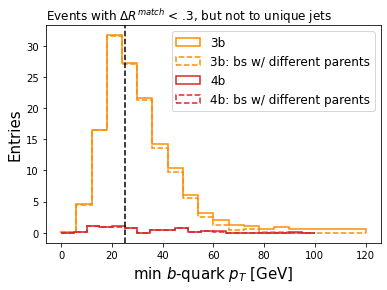

In [45]:
n = 20

plt.hist(min_bpt[(df_max8.resolved_nBTags==3) & ~df_max8.unique & df_max8.dRmatch],
         n,(0,120),color='darkorange',linestyle='-',
         histtype='step',linewidth=1.5,
         label='3b',
         weights=df_max8.loc[(df_max8.resolved_nBTags==3) & ~df_max8.unique & df_max8.dRmatch,'mcEventWeight'])
plt.hist(min_bpt[(df_max8.resolved_nBTags==3) & ~df_max8.unique & df_max8.dRmatch & ~df_max8.sameParent],
         n,(0,120),color='darkorange',linestyle='--',
         histtype='step',linewidth=1.5,
         label='3b: bs w/ different parents',
         weights=df_max8.loc[(df_max8.resolved_nBTags==3) & ~df_max8.unique & df_max8.dRmatch & ~df_max8.sameParent,'mcEventWeight'])

plt.hist(min_bpt[(df_max8.resolved_nBTags>=4) & ~df_max8.unique & df_max8.dRmatch],
         n,(0,100),color='C3',linestyle='-',
         histtype='step',linewidth=1.5,
         label='4b',
         weights=df_max8.loc[(df_max8.resolved_nBTags>=4) & ~df_max8.unique & df_max8.dRmatch,'mcEventWeight'])
plt.hist(min_bpt[(df_max8.resolved_nBTags>=4) & ~df_max8.unique & df_max8.dRmatch & ~df_max8.sameParent],
         n,(0,100),color='C3',linestyle='--',
         histtype='step',linewidth=1.5,
         label='4b: bs w/ different parents',
         weights=df_max8.loc[(df_max8.resolved_nBTags>=4) & ~df_max8.unique & df_max8.dRmatch & ~df_max8.sameParent,'mcEventWeight'])

plt.xlabel('min $b$-quark $p_T$ [GeV]',fontsize=15)
plt.ylabel('Entries',fontsize=15)
ylim = plt.ylim()
plt.plot([25,25],ylim,'k--')
plt.ylim(ylim)
plt.legend(fontsize=12)

ax = plt.gca()
plt.text(0,1,'Events with $\Delta R^{match}$ < .3, but not to unique jets',
         ha='left',va='bottom',transform=ax.transAxes,fontsize=12)

plt.savefig('figures/EDA/SMNR_mc16a_PFlow-MAR2020/min_b_pt.pdf',bbox_inches='tight')
plt.show()

I'm surprised this 15% difference isn't showing up more - tbh.

Could the 15% get washed out when we apply tagging?

In [46]:
mask = ~df_max8.unique & df_max8.dRmatch & ~df_max8.sameParent

np.sum(df_max8.loc[(min_bpt < 25) & mask,'mcEventWeight']) / np.sum(df_max8.loc[~df_max8.unique & df_max8.dRmatch,'mcEventWeight'])

0.36257064

In [47]:
mask = (df_max8.resolved_nBTags>=3) & ~df_max8.unique & df_max8.dRmatch & ~df_max8.sameParent

np.sum(df_max8.loc[(min_bpt < 25) & mask,'mcEventWeight']) / np.sum(df_max8.loc[~df_max8.unique & df_max8.dRmatch,'mcEventWeight'])

0.1899214

Nope doesn't seem to be a $b$-tagging issue - what's next to check?

- v boosted events? Could probe this with $p_T^{hh}$, $\Delta \phi(h_1,h_2)$, $\Delta \eta(h_1,h_2)$, $\Delta R(h_1,h_2)$

In [48]:
deta = df_max8.h0_eta - df_max8.h1_eta
dphi = np.arccos(np.cos(df_max8.h0_phi - df_max8.h1_phi))

df_max8['dr_hh'] = np.sqrt(deta**2 + dphi**2)

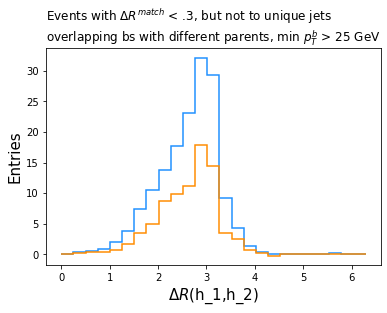

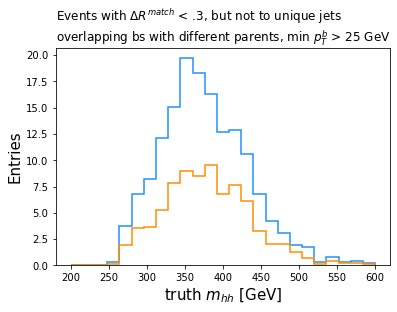

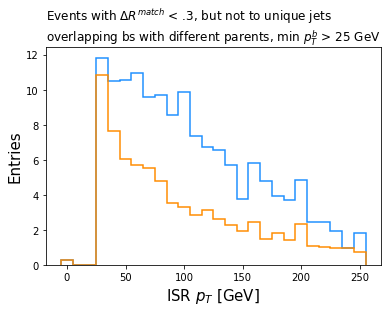

In [49]:
mask = (min_bpt > 25)& ~df_max8.unique & df_max8.dRmatch & ~df_max8.sameParent

t = 'Events with $\Delta R^{match}$ < .3, but not to unique jets\n'
t+= 'overlapping bs with different parents, $\min \ p_T^b$ > 25 GeV'


for c, nb, r, xlabel in zip(['dr_hh','truth_mhh','ISR_pt'],
                            [25,25,26], [(0,2*np.pi),(200,600),(-5,255)],
                            ['$\Delta R$(h_1,h_2)','truth $m_{hh}$ [GeV]','ISR $p_T$ [GeV]']):

    plt.hist(df_max8.loc[mask,c],nb, r,
             histtype='step',linewidth=1.5,color='dodgerblue',
             weights=df_max8.loc[mask,'mcEventWeight'])
    plt.hist(df_max8.loc[mask & (df_max8.resolved_nBTags>=3), c],nb, r,
             histtype='step',linewidth=1.5,color='darkorange',
             weights=df_max8.loc[mask & (df_max8.resolved_nBTags>=3),'mcEventWeight'])
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel('Entries',fontsize=15)
    
    ax = plt.gca()
    plt.text(0,1,t,ha='left',va='bottom',transform=ax.transAxes,fontsize=12)

    plt.savefig(f'figures/EDA/SMNR_mc16a_PFlow-MAR2020/{c}.pdf',bbox_inches='tight')

    plt.show()

Ok - *very boosted* isn't accounting for a lot of the events.

It is on the lower $m_{hh}$ region of the spectrum - but since this is before the trigger - I don't think it means that much actually.

The ISR jet $p_T$ dist looked cool!

**Q:** Can we associate the lower higgs $p_T$ events to an ISR recoil?

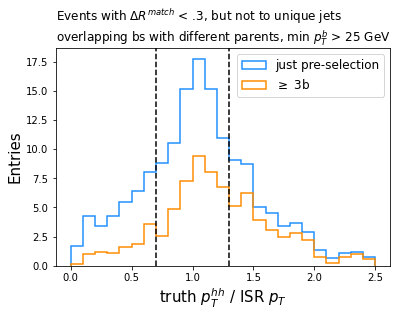

In [50]:
mask = (min_bpt > 25)& ~df_max8.unique & df_max8.dRmatch & ~df_max8.sameParent

plt.hist(df_max8.loc[mask,'truth_pthh'] / df_max8.loc[mask,'ISR_pt'],
         25,(0,2.5),histtype='step',linewidth=1.5,color='dodgerblue',
         label='just pre-selection',
         weights=df_max8.loc[mask,'mcEventWeight'])
plt.hist(df_max8.loc[mask & (df_max8.resolved_nBTags>=3),'truth_pthh']/df_max8.loc[mask & (df_max8.resolved_nBTags>=3) ,'ISR_pt'],
         25,(0,2.5),histtype='step',linewidth=1.5,color='darkorange',
         label='$\geq$ 3b',
         weights=df_max8.loc[mask & (df_max8.resolved_nBTags>=3),'mcEventWeight'])

plt.xlabel('truth $p_T^{hh}$ / ISR $p_T$',fontsize=15)
plt.ylabel('Entries',fontsize=15)
plt.legend(fontsize=12)
ylim = plt.ylim()
dx = .3
plt.plot([1-dx]*2,ylim,'k--')
plt.plot([1+dx]*2,ylim,'k--')
plt.ylim(ylim)

ax = plt.gca()
plt.text(0,1,t,ha='left',va='bottom',transform=ax.transAxes,fontsize=12)

plt.savefig(f'figures/EDA/SMNR_mc16a_PFlow-MAR2020/pt_hh_over_pt_ISR_dx_{dx}.pdf',bbox_inches='tight')

plt.show()

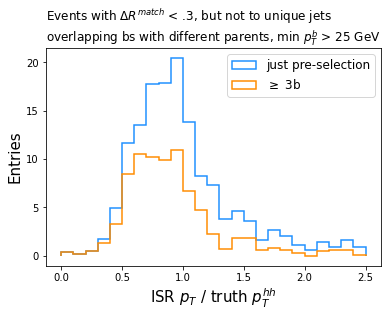

In [51]:
plt.hist(df_max8.loc[mask,'ISR_pt'] / df_max8.loc[mask,'truth_pthh'],
         25,(0,2.5),histtype='step',linewidth=1.5,color='dodgerblue',
         label='just pre-selection',
         weights=df_max8.loc[mask,'mcEventWeight'])
plt.hist(df_max8.loc[mask & (df_max8.resolved_nBTags>=3),'ISR_pt'] / df_max8.loc[mask & (df_max8.resolved_nBTags>=3),'truth_pthh'],
         25,(0,2.5),histtype='step',linewidth=1.5,color='darkorange',
         label='$\geq$ 3b',
         weights=df_max8.loc[mask & (df_max8.resolved_nBTags>=3),'mcEventWeight'])

plt.xlabel('ISR $p_T$ / truth $p_T^{hh}$',fontsize=15)
plt.ylabel('Entries',fontsize=15)
plt.legend(fontsize=12)
ylim = plt.ylim()

ax = plt.gca()
plt.text(0,1,t,ha='left',va='bottom',transform=ax.transAxes,fontsize=12)

plt.savefig(f'figures/EDA/SMNR_mc16a_PFlow-MAR2020/pt_ISR_over_pt_hh.pdf',bbox_inches='tight')

plt.show()

So - how often are we in this "recoil" category?

In [52]:
mask = recoil & (min_bpt > 25)& ~df_max8.unique & df_max8.dRmatch & ~df_max8.sameParent
np.sum(df_max8.loc[mask,'mcEventWeight']) / np.sum(df_max8.loc[~df_max8.unique & df_max8.dRmatch,'mcEventWeight'])

0.24604605

In [53]:
np.sum(df_max8.loc[mask& (df_max8.resolved_nBTags>=3),'mcEventWeight']) / np.sum(df_max8.loc[~df_max8.unique & df_max8.dRmatch & (df_max8.resolved_nBTags>=3),'mcEventWeight'])

0.24464893

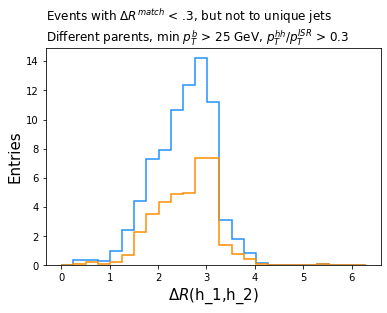

In [54]:

t = 'Events with $\Delta R^{match}$ < .3, but not to unique jets\n'
t+= 'Different parents, $\min \ p_T^b$ > 25 GeV, $p_T^{hh}$/$p_T^{ISR}$ > 0.3'

c, nb, r, xlabel ='dr_hh',25,(0,2*np.pi),'$\Delta R$(h_1,h_2)',
plt.hist(df_max8.loc[mask,c],nb, r,
         histtype='step',linewidth=1.5,color='dodgerblue',
         weights=df_max8.loc[mask,'mcEventWeight'])
plt.hist(df_max8.loc[mask & (df_max8.resolved_nBTags>=3), c],nb, r,
         histtype='step',linewidth=1.5,color='darkorange',
         weights=df_max8.loc[mask & (df_max8.resolved_nBTags>=3),'mcEventWeight'])
plt.xlabel(xlabel,fontsize=15)
plt.ylabel('Entries',fontsize=15)

ax = plt.gca()
plt.text(0,1,t,ha='left',va='bottom',transform=ax.transAxes,fontsize=12)

plt.savefig(f'figures/EDA/SMNR_mc16a_PFlow-MAR2020/{c}_notRecoil.pdf',bbox_inches='tight')

plt.show()

Ok - at this level I've at least convinced myself that this isn't a *huge* issue although I can come back and iterate on this if I look at pairAGraph failure modes and this seems to be an issue.

In [55]:
bi_drMatch = df_max8[[f'b{i}_drMatch' for i in range(4)]].values

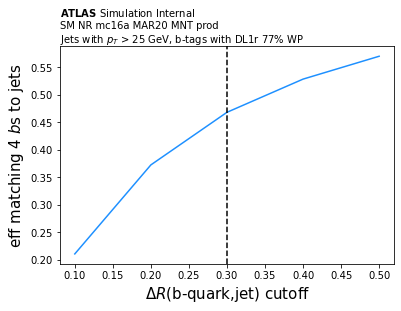

In [56]:
x = np.linspace(.1,.5,5)
y = np.zeros_like(x)

for i,Rmax in enumerate(x):
    
    dRcutoff = ~ np.sum(bi_drMatch > Rmax,axis=1).astype(bool)
    y[i] = np.sum(df_max8.loc[dRcutoff,'mcEventWeight']) / np.sum(df_max8.mcEventWeight)
    
plt.plot(x,y,color='dodgerblue')
plt.xlabel('$\Delta R$(b-quark,jet) cutoff',fontsize=15)
plt.ylabel('eff matching 4 $b$s to jets',fontsize=15)

ax = plt.gca()
plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)

ylim = plt.ylim()
plt.plot([.3]*2,ylim,'k--')
plt.ylim(ylim)

plt.savefig(f'figures/EDA/SMNR_mc16a_PFlow-MAR2020/dR_cutoff_preSel.pdf',bbox_inches='tight')

plt.show()

Honestly - I think this is an interesting plot already, and might be more interesting if I add some curves for extra masks.

Also - we need to be careful to use the *weighted* sum for these averages!!

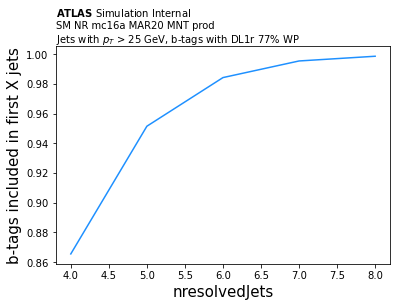

In [57]:
x = np.arange(4,9)
y = [np.sum((df_max8[f'ntag_max{i}']/df_max8['resolved_nBTags'])*df_max8['mcEventWeight'])/np.sum(df_max8['mcEventWeight']) \
     for i in x]

plt.plot(x,y,color='dodgerblue')
plt.xlabel('nresolvedJets',fontsize=15)
plt.ylabel('b-tags included in first X jets',fontsize=15)

ax = plt.gca()
plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)

plt.savefig(f'figures/EDA/SMNR_mc16a_PFlow-MAR2020/btag_vs_nJetsMax.pdf',bbox_inches='tight')

plt.show()

In [58]:
myText = '\n'.join(text.split('\n')[:-1] + ['DL1r 77% WP'])

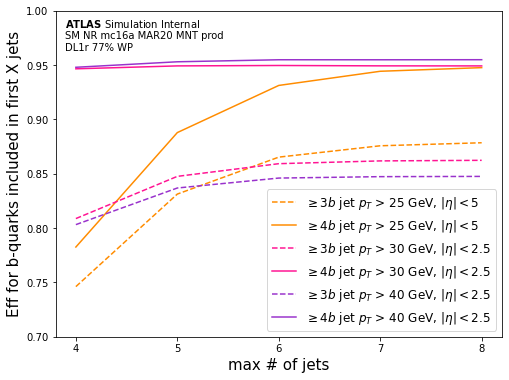

In [59]:
x = np.arange(4,9)
y1 = np.array([np.sum(df_max8[f'nb_max{i}']*df_max8['mcEventWeight'])/np.sum(df_max8['mcEventWeight'])\
               for i in x])
y2 = np.array([np.sum(df_max8.loc[df_max8.resolved_nBTags>=3,f'nb_max{i}']*df_max8.loc[df_max8.resolved_nBTags>=3,'mcEventWeight'])/np.sum(df_max8.loc[df_max8.resolved_nBTags>=3,'mcEventWeight']) \
               for i in x])
y3 = np.array([np.sum(df_max8.loc[df_max8.resolved_nBTags>=4,f'nb_max{i}']*df_max8.loc[df_max8.resolved_nBTags>=4,'mcEventWeight'])/np.sum(df_max8.loc[df_max8.resolved_nBTags>=4,'mcEventWeight']) \
               for i in x])

'''
Jets w/ pT > 30 GeV, |eta| < 2.5
'''
y4 = np.array([np.sum(df_selJets.loc[df_selJets[f'ntag_max{i}']>=3,f'nb_max{i}']*df_selJets.loc[df_selJets[f'ntag_max{i}']>=3,'mcEventWeight'])/np.sum(df_selJets.loc[df_selJets[f'ntag_max{i}']>=3,'mcEventWeight']) \
               for i in x])

y5 = np.array([np.sum(df_selJets.loc[df_selJets[f'ntag_max{i}']>=4,f'nb_max{i}']*df_selJets.loc[df_selJets[f'ntag_max{i}']>=4,'mcEventWeight'])/np.sum(df_selJets.loc[df_selJets[f'ntag_max{i}']>=4,'mcEventWeight']) for i in x])

'''
Jets w/ pT > 40 GeV, |eta| < 2.5
'''
y6 = np.array([np.sum(df_baseline.loc[df_baseline[f'ntag_max{i}']>=3,f'nb_max{i}']*df_baseline.loc[df_baseline[f'ntag_max{i}']>=3,'mcEventWeight'])/np.sum(df_baseline.loc[df_baseline[f'ntag_max{i}']>=3,'mcEventWeight']) \
               for i in x])
y7 = np.array([np.sum(df_baseline.loc[df_baseline[f'ntag_max{i}']>=4,f'nb_max{i}']*df_baseline.loc[df_baseline[f'ntag_max{i}']>=4,'mcEventWeight'])/np.sum(df_baseline.loc[df_baseline[f'ntag_max{i}']>=4,'mcEventWeight']) for i in x])

plt.figure(figsize=(8,6))
#plt.scatter(x,y1/4,label='preselection',color='dodgerblue')
plt.plot(x,y2/4,label='$\geq 3b$ jet $p_T$ > 25 GeV, $|\eta|<5$',color='darkorange',linestyle='--')
plt.plot(x,y3/4,label='$\geq 4b$ jet $p_T$ > 25 GeV, $|\eta|<5$',color='darkorange')
plt.plot(x,y4/4,label='$\geq 3b$ jet $p_T$ > 30 GeV, $|\eta|<2.5$',color='deeppink',linestyle='--')
plt.plot(x,y5/4,label='$\geq 4b$ jet $p_T$ > 30 GeV, $|\eta|<2.5$',color='deeppink')
plt.plot(x,y6/4,label='$\geq 3b$ jet $p_T$ > 40 GeV, $|\eta|<2.5$',color='darkorchid',linestyle='--')
plt.plot(x,y7/4,label='$\geq 4b$ jet $p_T$ > 40 GeV, $|\eta|<2.5$',color='darkorchid')

plt.xlabel('max # of jets',fontsize=15)
plt.ylabel('Eff for b-quarks included in first X jets',fontsize=15)
plt.ylim(.7,1)
plt.legend(fontsize=12)

plt.xticks(range(4,9))

ax = plt.gca()
plt.text(0.02,.98,myText,ha='left',va='top',transform=ax.transAxes)
plt.savefig('figures/EDA/bquarkMatchingEff_nJetsMax.pdf')

plt.show()

This is *very* interesting!!
- Really - it seems to be suggesting that the 3b category *might* have more to gain with this lower jet $p_T$ threshold.
- With the $p_T$ > 30 GeV, $\eta$ < 2.5 cut, we're *fine* with 5 jets, although we might do slightly better w/ 6 jets for the 3b category.

**Something I was confused about was how the looser jet selection yielded an overall *lower* efficiency for the 4b events...**

I'm going to try looking at some event displays to figure this out!

Ok - so there are different denominators b/w the pink and purple curves - and this must be accounting for the difference.

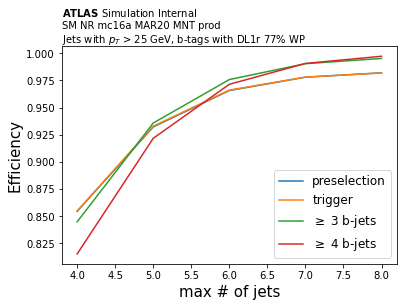

In [60]:
'''
Don't save this figure - the events aren't weighted!
'''

mask = np.ones_like(df_max8.index).astype(bool)

for m,l in zip([np.ones_like(df_max8.index).astype(bool), df_max8.trigger,(df_max8.resolved_nBTags >= 3),(df_max8.resolved_nBTags >= 4)],
               ['preselection', 'trigger', '$\geq$ 3 b-jets', '$\geq$ 4 b-jets']):

    mask = mask & m
    x = np.arange(4,9)
    y = [np.mean(df_max8.loc[mask,f'ntag_max{i}']/df_max8.loc[mask,'resolved_nBTags']) for i in x]
    #yerr = [np.std(df_max8[f'ntag_max{i}']) for i in x]

    plt.plot(x,y,label=l)

plt.ylabel('Efficiency', fontsize=15)
plt.xlabel('max # of jets', fontsize=15)
plt.legend(fontsize=12)

ax = plt.gca()
plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)

#plt.savefig(f'figures/EDA/{c}_triggerFirst.pdf',bbox_inches='tight')
plt.show()

Ok, so this is *also* a nice plot (that I might want to clean up a bit) - but I think the *ultimate* FOM is whether or not I've included the jets from the $b$-quarks

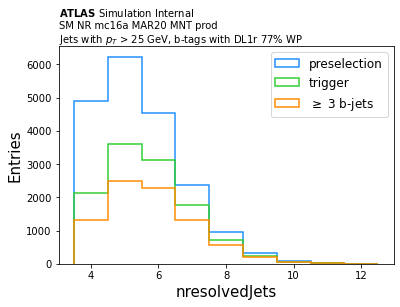

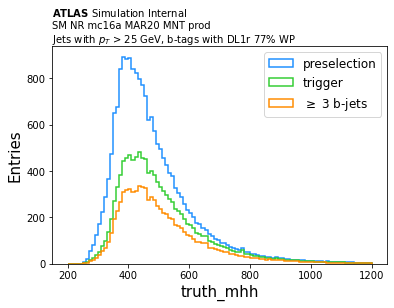

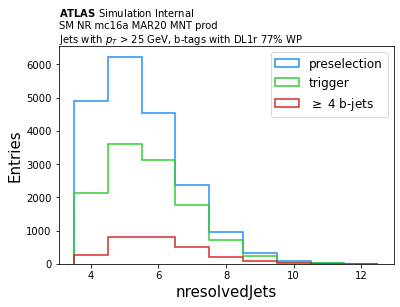

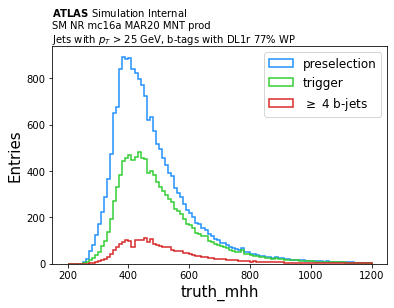

In [61]:
for nb,t,b_color in zip([3,4],['_3b',''],['darkorange','C3']):
    
    for c, n, r in zip(['nresolvedJets','truth_mhh'], [9,100], [(3.5, 12.5), (200,1200)]):

        mask = np.ones_like(mc16a.index).astype(bool)

        for m,l,color in zip([np.ones_like(mc16a.index).astype(bool), mc16a.trigger,(mc16a.resolved_nBTags >= nb)],
                             ['preselection', 'trigger', f'$\geq$ {nb} b-jets'],
                             ['dodgerblue','limegreen',b_color]):

            mask = mask & m
            plt.hist(mc16a.loc[mask,c],n,r,histtype='step', linewidth=1.5,
                     color=color,label=l, weights=mc16a.loc[mask,'mcEventWeight'])

        plt.ylabel('Entries', fontsize=15)
        plt.xlabel(c, fontsize=15)
        plt.legend(fontsize=12)

        ax = plt.gca()
        plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)

        plt.savefig(f'figures/EDA/{c}{t}_triggerFirst.pdf',bbox_inches='tight')
        plt.show()

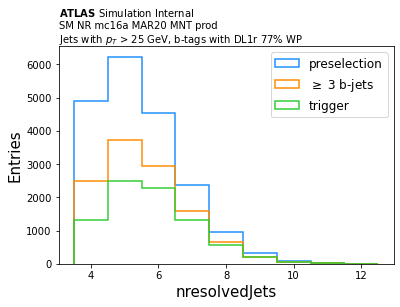

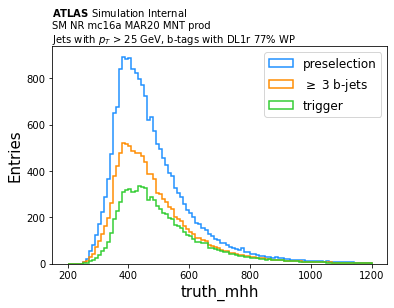

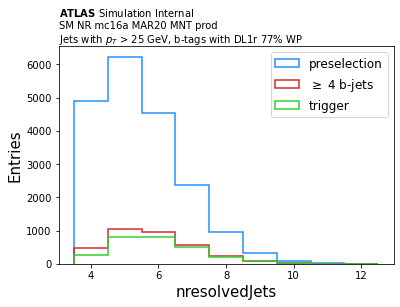

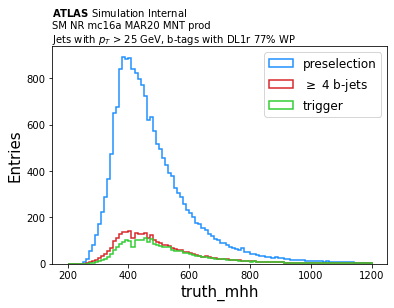

In [62]:
for nb,t,b_color in zip([3,4],['_3b',''],['darkorange','C3']):
    
    for c, n, r in zip(['nresolvedJets','truth_mhh'], [9,100], [(3.5, 12.5), (200,1200)]):

        mask = np.ones_like(mc16a.index).astype(bool)

        for m,l,color in zip([np.ones_like(mc16a.index).astype(bool),(mc16a.resolved_nBTags >= nb), mc16a.trigger],
                             ['preselection', f'$\geq$ {nb} b-jets', 'trigger'],
                             ['dodgerblue',b_color,'limegreen']):

            mask = mask & m
            plt.hist(mc16a.loc[mask,c],n,r,histtype='step', 
                     linewidth=1.5,color=color,
                     label=l, weights=mc16a.loc[mask,'mcEventWeight'])

        plt.ylabel('Entries', fontsize=15)
        plt.xlabel(c, fontsize=15)
        plt.legend(fontsize=12)

        ax = plt.gca()
        plt.text(0,1,text,ha='left',va='bottom',transform=ax.transAxes)

        plt.savefig(f'figures/EDA/{c}{t}_triggerLast.pdf',bbox_inches='tight')
        plt.show()

The plot below really needs to be broken down by however many jets I have.

And maybe adding the jet indices to the jet labels corresponding to each pair?

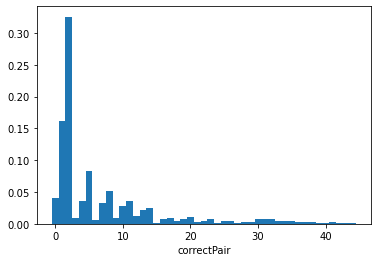

In [63]:
plt.hist(mc16a.correctPair,45,(-0.5,44.5),density=True)
plt.xlabel('correctPair')
plt.show()

In [64]:
np.max(df_baseline.correctPair)

207

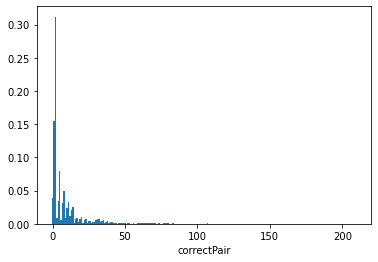

In [65]:
plt.hist(df_selJets.correctPair,210,(-0.5,209.5),density=True)
plt.xlabel('correctPair')
plt.show()

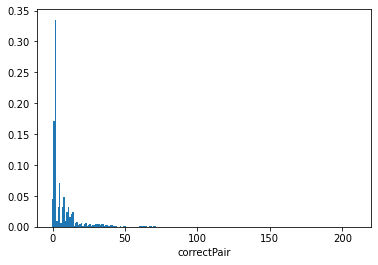

In [66]:
plt.hist(df_baseline.correctPair,210,(-0.5,209.5),density=True)
plt.xlabel('correctPair')
plt.show()

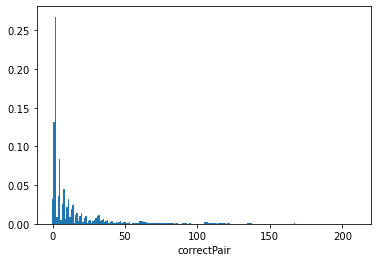

In [67]:
plt.hist(df_max8.correctPair,210,(-0.5,209.5),density=True)
plt.xlabel('correctPair')
plt.show()

For future reference - just checking what's in the Ntuple.

In [6]:
f = uproot.open(mc16a_filename)
t = f['XhhMiniNtuple']

In [7]:
t.keys()

[b'runNumber',
 b'eventNumber',
 b'lumiBlock',
 b'coreFlags',
 b'bcid',
 b'mcEventNumber',
 b'mcChannelNumber',
 b'mcEventWeight',
 b'NPV',
 b'actualInteractionsPerCrossing',
 b'averageInteractionsPerCrossing',
 b'weight_pileup',
 b'correctedAverageMu',
 b'correctedAndScaledAverageMu',
 b'correctedActualMu',
 b'correctedAndScaledActualMu',
 b'rand_run_nr',
 b'rand_lumiblock_nr',
 b'passedTriggerHashes',
 b'nresolvedJets',
 b'resolvedJets_E',
 b'resolvedJets_pt',
 b'resolvedJets_phi',
 b'resolvedJets_eta',
 b'resolvedJets_NumTrkPt1000PV',
 b'resolvedJets_SumPtTrkPt1000PV',
 b'resolvedJets_TrackWidthPt1000PV',
 b'resolvedJets_NumTrkPt500PV',
 b'resolvedJets_SumPtTrkPt500PV',
 b'resolvedJets_TrackWidthPt500PV',
 b'resolvedJets_JVFPV',
 b'resolvedJets_JvtJvfcorr',
 b'resolvedJets_JvtRpt',
 b'resolvedJets_Jvt',
 b'resolvedJets_JvtPass_Loose',
 b'resolvedJets_JvtEff_SF_Loose',
 b'resolvedJets_JvtPass_Medium',
 b'resolvedJets_JvtEff_SF_Medium',
 b'resolvedJets_JvtPass_Tight',
 b'resolvedJets_

## Preprocess a dataset

For starters, I want to use the same inputs that I used for my last presentation.


In [12]:
nJetsMax = 5
df1 = processDf(mc16a_filename,nJetsMax=nJetsMax,pT_min=40)


Opening ../../public/hh4b/SMNR/user.jagrundy.HH4B.450000.SM_HH.MC16a-2015-2016.AB21.2.91-MAR20-0.full_MiniNTuple.root/user.jagrundy.20736236._000001.MiniNTuple.root
Loading in the event df
Loading in the jet array

  Jet sfs for evts with 1 selected jets out of 4 resolved jets
  Jet sfs for evts with 2 selected jets out of 4 resolved jets
  Jet sfs for evts with 3 selected jets out of 4 resolved jets
  Jet sfs for evts with 4 selected jets out of 4 resolved jets

  Jet sfs for evts with 1 selected jets out of 5 resolved jets
  Jet sfs for evts with 2 selected jets out of 5 resolved jets
  Jet sfs for evts with 3 selected jets out of 5 resolved jets
  Jet sfs for evts with 4 selected jets out of 5 resolved jets
  Jet sfs for evts with 5 selected jets out of 5 resolved jets

  Jet sfs for evts with 1 selected jets out of 6 resolved jets
  Jet sfs for evts with 2 selected jets out of 6 resolved jets
  Jet sfs for evts with 3 selected jets out of 6 resolved jets
  Jet sfs for evts with 4 

In [13]:
for ntag in [3,2,1,0]:
    df1[(df1.njets>=4) & (df1.ntag>=ntag)].to_hdf(f'../data/SMNR_mc16a_PFlow-MAR2020-5jets/df_{ntag}b.h5',key='df')

In [14]:
# mc16d
mc16d_filename = '../../public/hh4b/SMNR/user.jagrundy.HH4B.450000.SM_HH.MC16d-2017.AB21.2.91-MAR20-0.full_MiniNTuple.root/user.jagrundy.20736216._00000{}.MiniNTuple.root'

df2 = processDf(mc16d_filename.format(1), nJetsMax=nJetsMax, pT_min=40, year=2017)
df3 = processDf(mc16d_filename.format(2), nJetsMax=nJetsMax, pT_min=40, year=2017)


Opening ../../public/hh4b/SMNR/user.jagrundy.HH4B.450000.SM_HH.MC16d-2017.AB21.2.91-MAR20-0.full_MiniNTuple.root/user.jagrundy.20736216._000001.MiniNTuple.root
Loading in the event df
Loading in the jet array

  Jet sfs for evts with 1 selected jets out of 4 resolved jets
  Jet sfs for evts with 2 selected jets out of 4 resolved jets
  Jet sfs for evts with 3 selected jets out of 4 resolved jets
  Jet sfs for evts with 4 selected jets out of 4 resolved jets

  Jet sfs for evts with 1 selected jets out of 5 resolved jets
  Jet sfs for evts with 2 selected jets out of 5 resolved jets
  Jet sfs for evts with 3 selected jets out of 5 resolved jets
  Jet sfs for evts with 4 selected jets out of 5 resolved jets
  Jet sfs for evts with 5 selected jets out of 5 resolved jets

  Jet sfs for evts with 1 selected jets out of 6 resolved jets
  Jet sfs for evts with 2 selected jets out of 6 resolved jets
  Jet sfs for evts with 3 selected jets out of 6 resolved jets
  Jet sfs for evts with 4 selec

  Jet sfs for evts with 3 selected jets out of 18 resolved jets
  Jet sfs for evts with 4 selected jets out of 18 resolved jets
  Jet sfs for evts with 5 selected jets out of 18 resolved jets
  Jet sfs for evts with 6 selected jets out of 18 resolved jets
  Jet sfs for evts with 7 selected jets out of 18 resolved jets
  Jet sfs for evts with 8 selected jets out of 18 resolved jets
  Jet sfs for evts with 9 selected jets out of 18 resolved jets

  Jet sfs for evts with 2 selected jets out of 19 resolved jets
  Jet sfs for evts with 3 selected jets out of 19 resolved jets
  Jet sfs for evts with 4 selected jets out of 19 resolved jets
  Jet sfs for evts with 5 selected jets out of 19 resolved jets
  Jet sfs for evts with 6 selected jets out of 19 resolved jets
  Jet sfs for evts with 7 selected jets out of 19 resolved jets

  Jet sfs for evts with 2 selected jets out of 20 resolved jets
  Jet sfs for evts with 4 selected jets out of 20 resolved jets
  Jet sfs for evts with 5 selected jet

In [15]:
for ntag in [3,2,1,0]:
    dfd = pd.concat([df2[(df2.njets>=4) & (df2.ntag>=ntag)],df3[(df3.njets>=4) & (df3.ntag>=ntag)]])
    dfd.to_hdf(f'../data/SMNR_mc16d_PFlow-MAR2020-5jets/df_{ntag}b.h5',key='df')

In [16]:
# mc16e
mc16e_filename = '../../public/hh4b/SMNR/user.jagrundy.HH4B.450000.SM_HH.MC16e-2018.AB21.2.91-MAR20-0.full_MiniNTuple.root/user.jagrundy.20736225._00000{}.MiniNTuple.root'
df4 = processDf(mc16e_filename.format(1),nJetsMax=nJetsMax,pT_min=40, year=2018)
df5 = processDf(mc16e_filename.format(2),nJetsMax=nJetsMax,pT_min=40, year=2018)


Opening ../../public/hh4b/SMNR/user.jagrundy.HH4B.450000.SM_HH.MC16e-2018.AB21.2.91-MAR20-0.full_MiniNTuple.root/user.jagrundy.20736225._000001.MiniNTuple.root
Loading in the event df
Loading in the jet array

  Jet sfs for evts with 1 selected jets out of 4 resolved jets
  Jet sfs for evts with 2 selected jets out of 4 resolved jets
  Jet sfs for evts with 3 selected jets out of 4 resolved jets
  Jet sfs for evts with 4 selected jets out of 4 resolved jets

  Jet sfs for evts with 1 selected jets out of 5 resolved jets
  Jet sfs for evts with 2 selected jets out of 5 resolved jets
  Jet sfs for evts with 3 selected jets out of 5 resolved jets
  Jet sfs for evts with 4 selected jets out of 5 resolved jets
  Jet sfs for evts with 5 selected jets out of 5 resolved jets

  Jet sfs for evts with 1 selected jets out of 6 resolved jets
  Jet sfs for evts with 2 selected jets out of 6 resolved jets
  Jet sfs for evts with 3 selected jets out of 6 resolved jets
  Jet sfs for evts with 4 selec

  Jet sfs for evts with 6 selected jets out of 18 resolved jets
  Jet sfs for evts with 7 selected jets out of 18 resolved jets
  Jet sfs for evts with 8 selected jets out of 18 resolved jets
  Jet sfs for evts with 9 selected jets out of 18 resolved jets

  Jet sfs for evts with 2 selected jets out of 19 resolved jets
  Jet sfs for evts with 3 selected jets out of 19 resolved jets
  Jet sfs for evts with 4 selected jets out of 19 resolved jets
  Jet sfs for evts with 5 selected jets out of 19 resolved jets
  Jet sfs for evts with 6 selected jets out of 19 resolved jets
  Jet sfs for evts with 7 selected jets out of 19 resolved jets
  Jet sfs for evts with 8 selected jets out of 19 resolved jets
  Jet sfs for evts with 10 selected jets out of 19 resolved jets

  Jet sfs for evts with 3 selected jets out of 20 resolved jets
  Jet sfs for evts with 4 selected jets out of 20 resolved jets
  Jet sfs for evts with 5 selected jets out of 20 resolved jets
  Jet sfs for evts with 6 selected je

  Jet sfs for evts with 4 selected jets out of 12 resolved jets
  Jet sfs for evts with 5 selected jets out of 12 resolved jets
  Jet sfs for evts with 6 selected jets out of 12 resolved jets
  Jet sfs for evts with 7 selected jets out of 12 resolved jets
  Jet sfs for evts with 8 selected jets out of 12 resolved jets
  Jet sfs for evts with 9 selected jets out of 12 resolved jets
  Jet sfs for evts with 10 selected jets out of 12 resolved jets
  Jet sfs for evts with 11 selected jets out of 12 resolved jets

  Jet sfs for evts with 2 selected jets out of 13 resolved jets
  Jet sfs for evts with 3 selected jets out of 13 resolved jets
  Jet sfs for evts with 4 selected jets out of 13 resolved jets
  Jet sfs for evts with 5 selected jets out of 13 resolved jets
  Jet sfs for evts with 6 selected jets out of 13 resolved jets
  Jet sfs for evts with 7 selected jets out of 13 resolved jets
  Jet sfs for evts with 8 selected jets out of 13 resolved jets
  Jet sfs for evts with 9 selected je

In [17]:
for ntag in [3,2,1,0]:
    dfe = pd.concat([df4[(df4.njets>=4) & (df4.ntag>=ntag)],df5[(df5.njets>=4) & (df5.ntag>=ntag)]])
    dfe.to_hdf(f'../data/SMNR_mc16e_PFlow-MAR2020-5jets/df_{ntag}b.h5',key='df')